<a href="https://colab.research.google.com/github/georgeputhean/pop-performance/blob/main/POP_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
pd.options.mode.chained_assignment = None 

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/Matched Data.csv")

In [ ]:
df.columns

Index(['Unnamed: 0', 'Grade_x', 'School Name', 'School Year_x', 'Notes',
       'Tangerine Test ID', 'Student Number', 'Student Test Number',
       'Date of Test', 'Control or Treatment?', 'Pre or Post?',
       'EGRA Section 1a Score', 'EGRA Section 1b Score',
       'EGRA Section 1c Score', 'EGRA Section 2a Score',
       'EGRA Section 2b Score', 'EGRA Section 3 Letters Correct',
       'EGRA Section 3 Time Completed', 'EGRA Section 3 LPM',
       'EGRA Section 4 Words Correct', 'EGRA Section 4 Time Completed',
       'EGRA Section 4: WPM', 'EGRA Section 5 Words Correct',
       'EGRA Section 5 Time Completed', 'EGRA Section 5 CWPM',
       'EGRA Section 5 Questions Correct',
       'EGRA Section 6 Written Words Correct',
       'EGRA Section 6 Correct Space/Direction',
       'EGRA Section 6 Correct Punctuation',
       'EGRA Section 6 Correct Use of Capitals', 'EGRA Section 7a Score',
       'Main Language Used In Exam', 'EGRA Question 1: Reading Habit',
       'EGRA Last Book Rea

In [ ]:
df1=df.drop(['School Name','Unnamed: 0','Notes','Tangerine Test ID','Student Number', 'Student Test Number','Skill to Improve 1 Notes','Skill to Improve 2 Notes','Skill to Improve 3 Notes',
       'Teacher Number: Teacher Number', 'Teacher Number: Full Name','Skill to Improve 3','Recommended Next Steps', 'What Went Well?', 'Second Teacher Present','Control or Treatment?',
       'School: School Name','Teacher Class Number', 'Teacher Assessment Number', 'Question 1', 'Question 2','Question 3','Question 4','Question 5','Question 6','Question 7','Question 8', 'Grade_y'],axis=1)

In [ ]:
df_target=df1.filter(like='EGRA Section')

In [ ]:
df_x = df1[df1.columns.drop(list(df.filter(regex='EGRA Section')))]

In [ ]:
len(df_target.columns)

20

In [ ]:
df_x.columns

Index(['Grade_x', 'School Year_x', 'Date of Test', 'Pre or Post?',
       'Main Language Used In Exam', 'EGRA Question 1: Reading Habit',
       'EGRA Last Book Read', 'Reads With Others',
       'How Often, ReadsWithOthers', 'Student Gender', 'Class Number', 'Date',
       'Q1 Rating or Answer', 'Q2 Rating', 'Q3 Rating or Answer',
       'Q4 Rating or Answer', 'Q5 Rating or Answer', 'Q6 Rating or Answer',
       'Q7 Rating', 'Q8 Rating', 'Skill to Improve 1', 'Skill to Improve 2',
       'Minutes Spent Observing', 'Minutes Spent Coaching', 'Total Score',
       'Teacher Number: Gender',
       'Teacher Number: School Years in Teacher Support Program',
       'Teacher Present', 'Average Students Enrolled', 'School Year_y'],
      dtype='object')

In [ ]:
df_x.to_csv("New Target.csv")

In [ ]:
df_x_clean=df_x

In [ ]:
df_x_clean['Grade_x']=df_x['Grade_x'].str[8:9]

In [ ]:
df_x_clean['Q1 Rating or Answer']=df_x['Q1 Rating or Answer'].str[0:1]
df_x_clean['Q2 Rating'] = df_x['Q2 Rating'].str[0:1]
df_x_clean['Q3 Rating or Answer']= df_x['Q3 Rating or Answer'].str[0:1]
df_x_clean['Q4 Rating or Answer']= df_x['Q4 Rating or Answer'].str[0:1]
df_x_clean['Q5 Rating or Answer']= df_x['Q5 Rating or Answer'].str[0:1]
df_x_clean['Q6 Rating or Answer']= df_x['Q6 Rating or Answer'].str[0:1]
df_x_clean['Q7 Rating']= df_x['Q7 Rating'].str[0:1]
df_x_clean['Q8 Rating']= df_x['Q8 Rating'].str[0:1]

In [ ]:
len(df_x_clean.columns)

30

Set the Rating to None when teacher not present

In [ ]:
df_x_clean[['Q1 Rating or Answer','Q2 Rating','Q3 Rating or Answer','Q4 Rating or Answer','Q5 Rating or Answer','Q6 Rating or Answer','Q7 Rating','Q8 Rating']]=df_x_clean[['Q1 Rating or Answer','Q2 Rating','Q3 Rating or Answer','Q4 Rating or Answer','Q5 Rating or Answer','Q6 Rating or Answer','Q7 Rating','Q8 Rating']].fillna(0)

In [ ]:
df_x_clean[df_x_clean['Teacher Present']=='Not Present'].count()

Grade_x                                                    277
School Year_x                                              277
Date of Test                                               277
Pre or Post?                                               277
Main Language Used In Exam                                 272
EGRA Question 1: Reading Habit                             277
EGRA Last Book Read                                        277
Reads With Others                                          277
How Often, ReadsWithOthers                                 277
Student Gender                                             277
Class Number                                               277
Date                                                       277
Q1 Rating or Answer                                        277
Q2 Rating                                                  277
Q3 Rating or Answer                                        277
Q4 Rating or Answer                                    

In [ ]:
df_x_clean['Q1 Rating or Answer'].value_counts()

3    474
2    306
0    277
Name: Q1 Rating or Answer, dtype: int64

Minutes mean

In [ ]:
mean_min=df_x_clean[['Minutes Spent Observing','Minutes Spent Coaching']].mean()

In [ ]:
df_x_clean[['Minutes Spent Observing','Minutes Spent Coaching']]=df_x_clean[['Minutes Spent Observing','Minutes Spent Coaching']].fillna(mean_min)

Skills to None

In [ ]:
df_x_clean[['Skill to Improve 1','Skill to Improve 2']]=df_x_clean[['Skill to Improve 1','Skill to Improve 2']].fillna("None")

In [ ]:
df_x_clean[['Main Language Used In Exam']].value_counts()

Main Language Used In Exam
English; Ewe                  776
English                       167
Ewe                            95
dtype: int64

In [ ]:
df_x_clean[['Main Language Used In Exam']]=df_x_clean[['Main Language Used In Exam']].fillna("English; Ewe")

In [ ]:
#ns.pairplot(df1,hue="Pre or Post?")

In [ ]:
df_x_clean.columns

Index(['Grade_x', 'School Year_x', 'Date of Test', 'Pre or Post?',
       'Main Language Used In Exam', 'EGRA Question 1: Reading Habit',
       'EGRA Last Book Read', 'Reads With Others',
       'How Often, ReadsWithOthers', 'Student Gender', 'Class Number', 'Date',
       'Q1 Rating or Answer', 'Q2 Rating', 'Q3 Rating or Answer',
       'Q4 Rating or Answer', 'Q5 Rating or Answer', 'Q6 Rating or Answer',
       'Q7 Rating', 'Q8 Rating', 'Skill to Improve 1', 'Skill to Improve 2',
       'Minutes Spent Observing', 'Minutes Spent Coaching', 'Total Score',
       'Teacher Number: Gender',
       'Teacher Number: School Years in Teacher Support Program',
       'Teacher Present', 'Average Students Enrolled', 'School Year_y'],
      dtype='object')

In [ ]:
df_x_clean.count()

Grade_x                                                    1057
School Year_x                                              1057
Date of Test                                               1057
Pre or Post?                                               1057
Main Language Used In Exam                                 1057
EGRA Question 1: Reading Habit                             1057
EGRA Last Book Read                                        1057
Reads With Others                                          1057
How Often, ReadsWithOthers                                 1057
Student Gender                                             1057
Class Number                                               1057
Date                                                       1057
Q1 Rating or Answer                                        1057
Q2 Rating                                                  1057
Q3 Rating or Answer                                        1057
Q4 Rating or Answer                     

In [ ]:
df_x_clean['Teacher Number: School Years in Teacher Support Program']=df_x_clean['Teacher Number: School Years in Teacher Support Program'].str.count('-')

In [ ]:
df_q=df_x_clean.filter(like='Rating')

In [ ]:
df_q = df_q.astype('int')

<Figure size 1152x432 with 0 Axes>

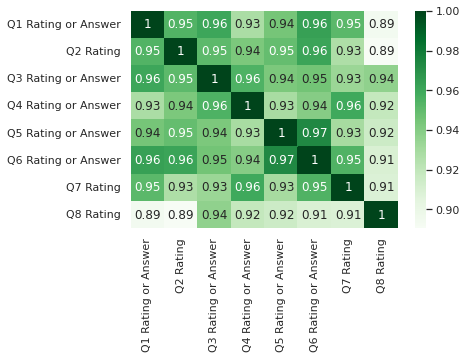

<Figure size 1152x432 with 0 Axes>

In [ ]:
sns.heatmap(df_q.corr(),annot=True,cmap="Greens")
plt.figure(figsize=(16, 6))


In [ ]:
df_target['EGRA Section 1 Total Score']=df_target['EGRA Section 1a Score']+df_target['EGRA Section 1b Score']+df_target['EGRA Section 1c Score']
df_target['EGRA Section 6 Total Score']=df_target['EGRA Section 6 Written Words Correct']+df_target['EGRA Section 6 Correct Space/Direction']+df_target['EGRA Section 6 Correct Punctuation']+df_target['EGRA Section 6 Correct Use of Capitals']

In [ ]:
df_target['EGRA Section 3 LPM']=df_target['EGRA Section 3 LPM'].fillna(df_target['EGRA Section 3 LPM'].mean())

In [ ]:
df_target.count()

EGRA Section 1a Score                     1057
EGRA Section 1b Score                     1057
EGRA Section 1c Score                     1057
EGRA Section 2a Score                     1057
EGRA Section 2b Score                     1057
EGRA Section 3 Letters Correct            1057
EGRA Section 3 Time Completed             1055
EGRA Section 3 LPM                        1057
EGRA Section 4 Words Correct              1057
EGRA Section 4 Time Completed             1052
EGRA Section 4: WPM                       1057
EGRA Section 5 Words Correct              1057
EGRA Section 5 Time Completed             1054
EGRA Section 5 CWPM                       1057
EGRA Section 5 Questions Correct          1057
EGRA Section 6 Written Words Correct      1057
EGRA Section 6 Correct Space/Direction    1057
EGRA Section 6 Correct Punctuation        1057
EGRA Section 6 Correct Use of Capitals    1057
EGRA Section 7a Score                     1057
EGRA Section 1 Total Score                1057
EGRA Section 

In [ ]:
df_target_unique=df_target.drop(columns=['EGRA Section 1a Score','EGRA Section 1b Score','EGRA Section 1c Score',
                        'EGRA Section 6 Written Words Correct','EGRA Section 6 Correct Space/Direction','EGRA Section 6 Correct Punctuation','EGRA Section 6 Correct Use of Capitals',
                        'EGRA Section 3 Letters Correct', 'EGRA Section 3 Time Completed',
                        'EGRA Section 4 Words Correct','EGRA Section 4 Time Completed',
                        'EGRA Section 5 Words Correct', 'EGRA Section 5 Time Completed',
                        ])

In [ ]:
df_target_unique.columns

Index(['EGRA Section 2a Score', 'EGRA Section 2b Score', 'EGRA Section 3 LPM',
       'EGRA Section 4: WPM', 'EGRA Section 5 CWPM',
       'EGRA Section 5 Questions Correct', 'EGRA Section 7a Score',
       'EGRA Section 1 Total Score', 'EGRA Section 6 Total Score'],
      dtype='object')

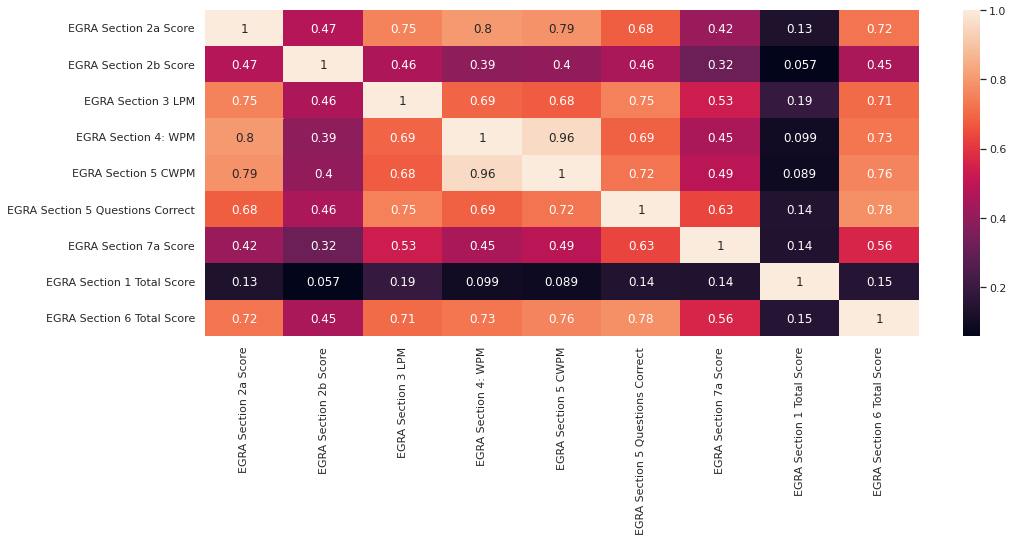

In [ ]:
plt.figure(figsize=(16, 6))

sns.heatmap(df_target_unique.corr(),annot=True);


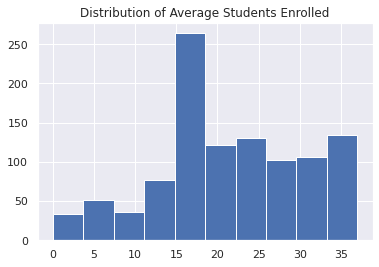

In [ ]:
plt.hist(df_x_clean['Average Students Enrolled'])
plt.title("Distribution of Average Students Enrolled")
plt.show()


In [ ]:
df_target

,EGRA Section 1a Score,EGRA Section 1b Score,EGRA Section 1c Score,EGRA Section 2a Score,EGRA Section 2b Score,EGRA Section 3 Letters Correct,EGRA Section 3 Time Completed,EGRA Section 3 LPM,EGRA Section 4 Words Correct,EGRA Section 4 Time Completed,...,EGRA Section 5 Time Completed,EGRA Section 5 CWPM,EGRA Section 5 Questions Correct,EGRA Section 6 Written Words Correct,EGRA Section 6 Correct Space/Direction,EGRA Section 6 Correct Punctuation,EGRA Section 6 Correct Use of Capitals,EGRA Section 7a Score,EGRA Section 1 Total Score,EGRA Section 6 Total Score
0,1,1,1,0,3,14,60.0,14.0,45,43.0,...,38.0,93,0,0,1,0,0,0,3,1
1,1,1,1,0,0,52,60.0,52.0,23,60.0,...,103.0,30,3,0,2,0,0,2,3,2
2,1,1,1,0,0,28,60.0,28.0,32,60.0,...,70.0,50,2,0,1,0,0,3,3,1
3,1,1,1,12,7,75,60.0,75.0,12,60.0,...,117.0,24,6,0,2,0,0,3,3,2
4,1,1,1,0,6,26,60.0,26.0,12,60.0,...,121.0,25,0,0,1,0,1,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052,1,1,1,0,2,3,60.0,3.0,0,16.0,...,96.0,1,0,0,2,0,0,0,3,2
1053,1,1,1,5,0,32,60.0,32.0,0,15.0,...,180.0,4,2,0,1,0,0,3,3,1
1054,1,1,1,0,1,2,60.0,2.0,0,8.0,...,16.0,0,0,0,2,0,0,0,3,2
1055,1,1,1,0,5,1,60.0,1.0,0,11.0,...,31.0,0,0,0,0,0,0,1,3,0


In [ ]:
df_target_unique.to_csv("Target_Pop.csv")

In [ ]:
df_x_clean.to_csv("Feature_Pop .csv")

In [ ]:
df_x_clean.columns

Index(['Grade_x', 'School Year_x', 'Date of Test', 'Pre or Post?',
       'Main Language Used In Exam', 'EGRA Question 1: Reading Habit',
       'EGRA Last Book Read', 'Reads With Others',
       'How Often, ReadsWithOthers', 'Student Gender', 'Class Number', 'Date',
       'Q1 Rating or Answer', 'Q2 Rating', 'Q3 Rating or Answer',
       'Q4 Rating or Answer', 'Q5 Rating or Answer', 'Q6 Rating or Answer',
       'Q7 Rating', 'Q8 Rating', 'Skill to Improve 1', 'Skill to Improve 2',
       'Minutes Spent Observing', 'Minutes Spent Coaching', 'Total Score',
       'Teacher Number: Gender',
       'Teacher Number: School Years in Teacher Support Program',
       'Teacher Present', 'Average Students Enrolled', 'School Year_y'],
      dtype='object')

In [ ]:
df_x_clean['How Often, ReadsWithOthers'].astype('category')

0       1
1       3
2       1
3       1
4       2
       ..
1052    2
1053    1
1054    3
1055    3
1056    3
Name: How Often, ReadsWithOthers, Length: 1057, dtype: category
Categories (5, int64): [0, 1, 2, 3, 4]

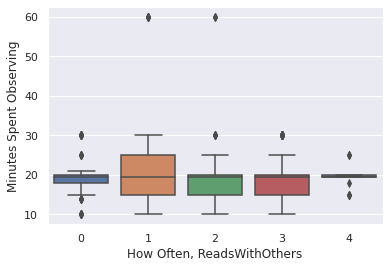

In [ ]:
sns.boxplot(x=df_x_clean['How Often, ReadsWithOthers'],y=df_x_clean['Minutes Spent Observing'])


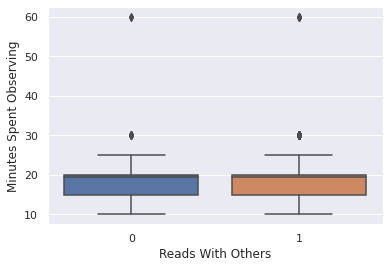

In [ ]:
sns.boxplot(x=df_x_clean['Reads With Others'],y=df_x_clean['Minutes Spent Observing'])
sns.set(style="darkgrid")


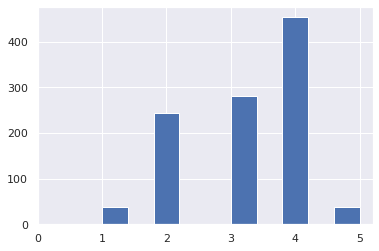

In [ ]:
plt.hist(df_x_clean['Teacher Number: School Years in Teacher Support Program'])
plt.xticks(range(6))
plt.show()

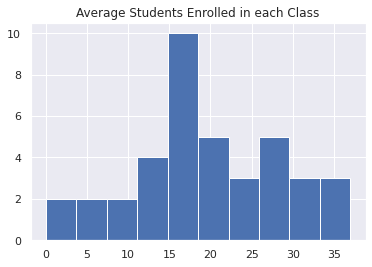

In [ ]:
plt.hist(df_x_clean.groupby('Class Number')['Average Students Enrolled'].first())
plt.title("Average Students Enrolled in each Class")
plt.show()